<a href="https://colab.research.google.com/github/fajrulsantoso/Pcvk_2025-2026/blob/main/%E2%80%9CWeek3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRAKTIKUM D1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Path gambar di Google Drive
path = '/content/drive/MyDrive/Pcvk/unnamed.jpg'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


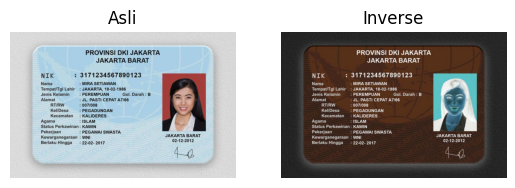

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Baca gambar
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Inverse
inverse = 255 - img

# Tampilkan
plt.subplot(1,2,1); plt.imshow(img); plt.title("Asli"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(inverse); plt.title("Inverse"); plt.axis("off")
plt.show()


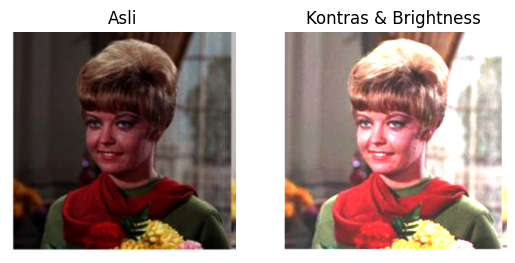

In [ ]:
# Path gambar lain (bukan KTP)
path_contrast = '/content/drive/MyDrive/Pcvk/bagus.PNG'  # ganti sesuai file lain

# Baca gambar
img2 = cv2.imread(path_contrast)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Parameter kontras & brightness
alpha, beta = 2.0, 50

# Transformasi
adjusted = cv2.convertScaleAbs(img2, alpha=alpha, beta=beta)

# Tampilkan
plt.subplot(1,2,1); plt.imshow(img2); plt.title("Asli"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(adjusted); plt.title("Kontras & Brightness"); plt.axis("off")
plt.show()


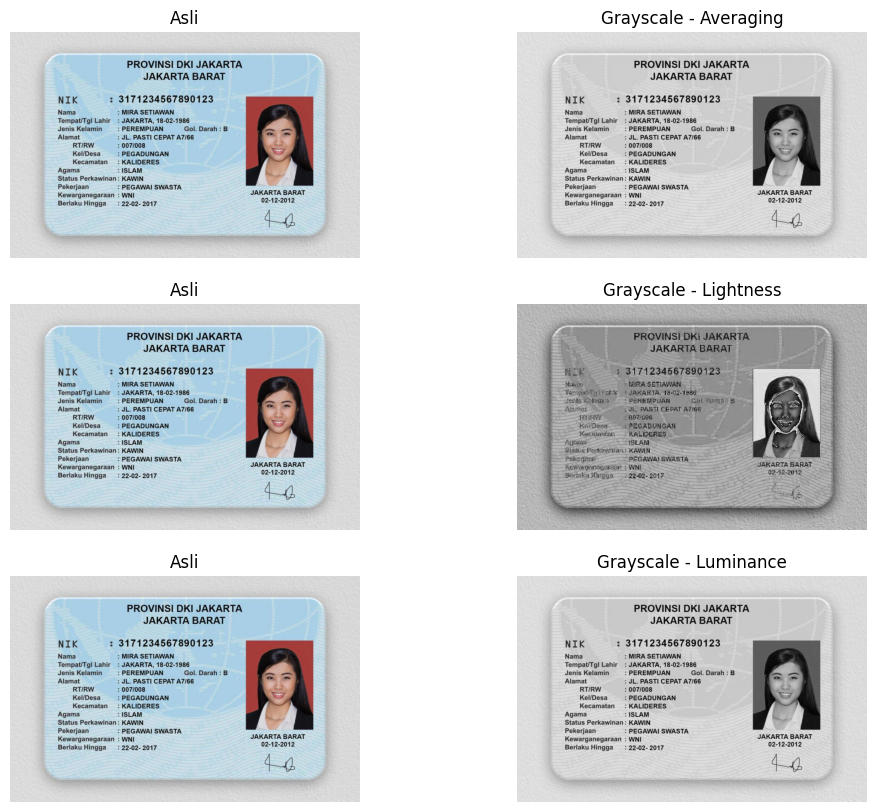

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Path gambar KTP di Google Drive
path_gray = '/content/drive/MyDrive/Pcvk/unnamed.jpg'

# Baca gambar
img = cv2.imread(path_gray)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- 1. Averaging ---
gray_avg = np.mean(img, axis=2).astype(np.uint8)

# --- 2. Lightness ---
gray_light = ((np.max(img, axis=2) + np.min(img, axis=2)) / 2).astype(np.uint8)

# --- 3. Luminance ---
gray_lum = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]).astype(np.uint8)

# --- Tampilkan ---
plt.figure(figsize=(12,10))

plt.subplot(3,2,1); plt.imshow(img); plt.title("Asli"); plt.axis("off")
plt.subplot(3,2,2); plt.imshow(gray_avg, cmap='gray'); plt.title("Grayscale - Averaging"); plt.axis("off")

plt.subplot(3,2,3); plt.imshow(img); plt.title("Asli"); plt.axis("off")
plt.subplot(3,2,4); plt.imshow(gray_light, cmap='gray'); plt.title("Grayscale - Lightness"); plt.axis("off")

plt.subplot(3,2,5); plt.imshow(img); plt.title("Asli"); plt.axis("off")
plt.subplot(3,2,6); plt.imshow(gray_lum, cmap='gray'); plt.title("Grayscale - Luminance"); plt.axis("off")

plt.show()


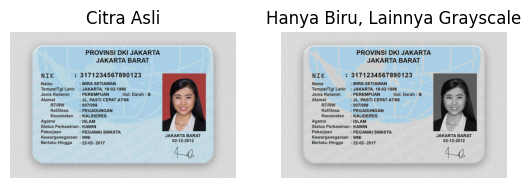

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path gambar KTP
path_color = '/content/drive/MyDrive/Pcvk/unnamed.jpg'

# Baca gambar
img = cv2.imread(path_color)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Ubah ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# Ubah ke HSV (supaya mudah deteksi biru)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Range warna biru (bisa disesuaikan)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# Buat mask biru
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Gabungkan: bagian biru pakai warna asli, sisanya grayscale
result = np.where(mask[:,:,None] > 0, img, gray_rgb)

# Tampilkan
plt.subplot(1,2,1); plt.imshow(img); plt.title("Citra Asli"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(result); plt.title("Hanya Biru, Lainnya Grayscale"); plt.axis("off")
plt.show()


## PRAKTIKUM D2.Operasi Aritmatika dan Logika

Masukkan nilai Gamma: 3


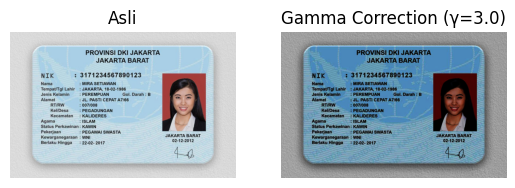

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Path gambar (pakai contoh: fajrul.jpg atau gambar lain di Drive)
path_gamma = '/content/drive/MyDrive/Pcvk/unnamed.jpg'

# Baca gambar
img = cv2.imread(path_gamma)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Input gamma dari user
try:
    gamma = float(input("Masukkan nilai Gamma: "))
except ValueError:
    print("Error, not a number")
    gamma = 1.0

# Normalisasi ke [0,1], lalu terapkan gamma correction
normalized = img / 255.0
gamma_corrected = np.power(normalized, gamma)

# Kembalikan ke [0,255]
gamma_corrected = np.uint8(gamma_corrected * 255)

# Tampilkan
plt.subplot(1,2,1); plt.imshow(img); plt.title("Asli"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(gamma_corrected); plt.title(f"Gamma Correction (γ={gamma})"); plt.axis("off")
plt.show()


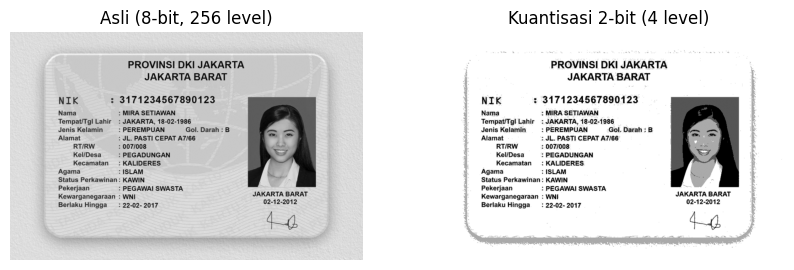

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Pilih bit depth yang diinginkan
bit_depth = 2  # bisa diganti: 1,2,3,4,5,6,7,8

# Baca gambar grayscale (path sudah diganti jadi Unnamed)
original = cv2.imread('/content/drive/MyDrive/Pcvk/unnamed.jpg',
                      cv2.IMREAD_GRAYSCALE)

# Hitung level sesuai bit depth
levels = 2 ** bit_depth
step = 256 // levels

# Kuantisasi (diskritisasi level abu-abu)
quantized = (original // step) * step

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(original, cmap='gray')
plt.title("Asli (8-bit, 256 level)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(quantized, cmap='gray')
plt.title(f"Kuantisasi {bit_depth}-bit ({levels} level)")
plt.axis("off")

plt.show()


3. Buat modul Average Denoising

In [20]:
import cv2, glob, os
import numpy as np
import pandas as pd
from skimage.metrics import peak_signal_noise_ratio as psnr

# Path folder
path = "/content/drive/MyDrive/Pcvk/noises/noises"

# Ambil semua file angka dan urutkan
files = sorted(
    [f for f in glob.glob(os.path.join(path, "*.*")) if os.path.splitext(os.path.basename(f))[0].isdigit()],
    key=lambda x: int(os.path.splitext(os.path.basename(x))[0])
)

print("Total file:", len(files))

# File pertama = citra asli
img_asli = cv2.imread(files[0], cv2.IMREAD_GRAYSCALE)

hasil = []
for k in range(3, 16, 2):
    psnr_vals = []
    for f in files[1:]:
        noisy = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        filtered = cv2.blur(noisy, (k,k))
        if filtered.shape != img_asli.shape:
            filtered = cv2.resize(filtered, (img_asli.shape[1], img_asli.shape[0]))
        psnr_vals.append(psnr(img_asli, filtered))
    hasil.append([k, np.mean(psnr_vals)])

# DataFrame hasil
df = pd.DataFrame(hasil, columns=["Kernel", "Average PSNR"])
print(df)


Total file: 100
   Kernel  Average PSNR
0       3     22.225802
1       5     21.970400
2       7     21.842490
3       9     21.736576
4      11     21.652104
5      13     21.576200
6      15     21.507717


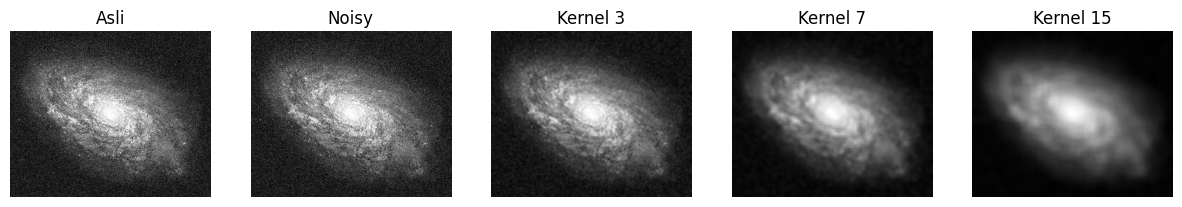

In [19]:
import matplotlib.pyplot as plt

# Ambil 1 contoh noisy
contoh_file = files[10]  # misalnya gambar ke-10
img_noisy = cv2.imread(contoh_file)
img_noisy = cv2.cvtColor(img_noisy, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,4))

# 1. Citra asli
plt.subplot(1,5,1)
plt.imshow(img_asli, cmap='gray')
plt.title("Asli")
plt.axis("off")

# 2. Citra noisy
plt.subplot(1,5,2)
plt.imshow(img_noisy, cmap='gray')
plt.title("Noisy")
plt.axis("off")

# 3. Filter kernel 3, 7, 15
for idx, k in enumerate([3,7,15], start=3):
    filtered = cv2.blur(img_noisy, (k,k))
    plt.subplot(1,5,idx)  # sekarang 1 baris 5 kolom
    plt.imshow(filtered, cmap='gray')
    plt.title(f"Kernel {k}")   # <-- sudah bener, string lengkap
    plt.axis("off")

plt.show()


Berdasarkan hasil PSNR, semakin tinggi nilainya maka kualitas citra semakin baik karena noise berkurang tanpa merusak detail. Kernel kecil umumnya memberi PSNR lebih tinggi dibanding kernel besar yang membuat citra lebih blur. Filter median juga lebih efektif daripada filter rata-rata untuk noise salt-and-pepper.